In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql


In [2]:
bank = pd.read_csv(r"C:\Users\nagas\OneDrive\Desktop\bank-direct-marketing-campaigns.csv",header = 0)
bank_bk = bank.copy()
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [4]:
target_count = bank.y.value_counts()
print("class 0:",target_count[0])
print("class 1:",target_count[1])
print("proportion :",round(target_count[0]/target_count[1],2),":1")
print("Total records",len(bank))


class 0: 36548
class 1: 4640
proportion : 7.88 :1
Total records 41188


In [5]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

bank['job'] = le.fit_transform(bank[['job']])
bank['marital'] = le.fit_transform(bank[['marital']])
bank['education'] = le.fit_transform(bank[['education']])
bank['default'] = le.fit_transform(bank[['default']])
bank['housing'] = le.fit_transform(bank[['housing']])
bank['loan'] = le.fit_transform(bank[['loan']])
bank['contact'] = le.fit_transform(bank[['contact']])
bank['month'] = le.fit_transform(bank[['month']])
bank['day_of_week'] = le.fit_transform(bank[['day_of_week']])
bank['y'] = le.fit_transform(bank[['y']])
bank['poutcome'] = le.fit_transform(bank[['poutcome']])

In [7]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int32  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
IndepVar = []
for col in bank.columns:
    if col!= 'y':
        IndepVar.append(col)
        
TargetVar = 'y'
x = bank[IndepVar]
y = bank[TargetVar]

In [9]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32950, 19), (8238, 19), (32950,), (8238,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [13]:
Results=pd.read_csv(r"C:\Users\nagas\OneDrive\Desktop\Results.csv")
Results.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 191  744]
 [ 109 7194]]
Outcome values : 
 191 744 109 7194
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.20      0.31       935
           0       0.91      0.99      0.94      7303

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238

Accuracy : 89.6 %
Precision : 63.7 %
Recall : 20.4 %
F1 Score : 0.309
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 59.4 %
MCC : 0.321
roc_auc_score: 0.595


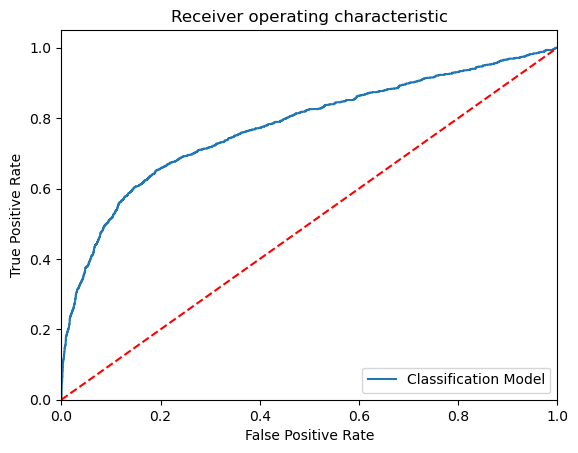

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 351  584]
 [ 856 6447]]
Outcome values : 
 351 584 856 6447
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.38      0.33       935
           0       0.92      0.88      0.90      7303

    accuracy                           0.83      8238
   macro avg       0.60      0.63      0.61      8238
weighted avg       0.85      0.83      0.83      8238

Accuracy : 82.5 %
Precision : 29.1 %
Recall : 37.5 %
F1 Score : 0.328
Specificity or True Negative Rate : 88.3 %
Balanced Accuracy : 62.9 %
MCC : 0.232
roc_auc_score: 0.629


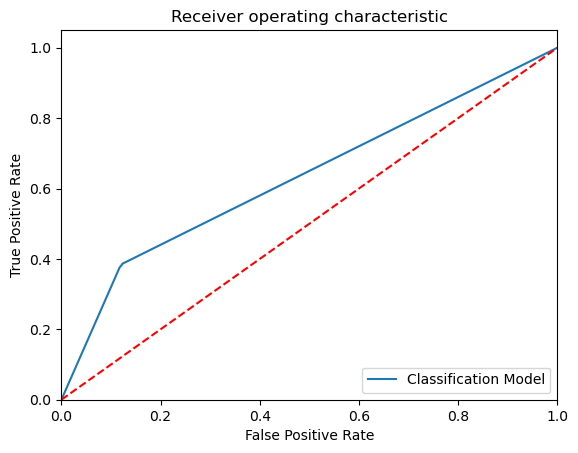

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 267  668]
 [ 222 7081]]
Outcome values : 
 267 668 222 7081
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.29      0.38       935
           0       0.91      0.97      0.94      7303

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Accuracy : 89.2 %
Precision : 54.6 %
Recall : 28.6 %
F1 Score : 0.375
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 62.8 %
MCC : 0.343
roc_auc_score: 0.628


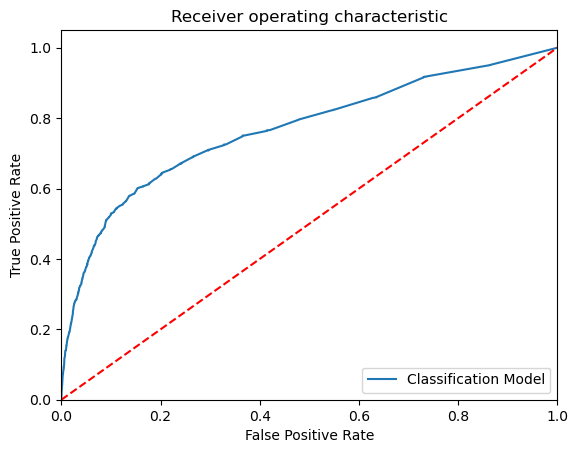

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 290  645]
 [ 286 7017]]
Outcome values : 
 290 645 286 7017
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.31      0.38       935
           0       0.92      0.96      0.94      7303

    accuracy                           0.89      8238
   macro avg       0.71      0.64      0.66      8238
weighted avg       0.87      0.89      0.87      8238

Accuracy : 88.7 %
Precision : 50.3 %
Recall : 31.0 %
F1 Score : 0.384
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 63.6 %
MCC : 0.337
roc_auc_score: 0.635


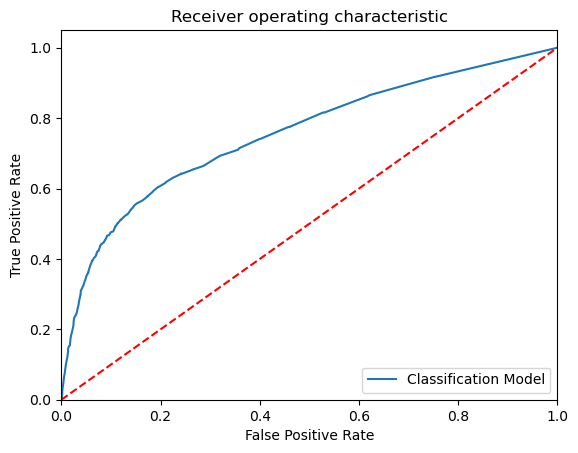

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 233  702]
 [ 244 7059]]
Outcome values : 
 233 702 244 7059
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.25      0.33       935
           0       0.91      0.97      0.94      7303

    accuracy                           0.89      8238
   macro avg       0.70      0.61      0.63      8238
weighted avg       0.86      0.89      0.87      8238

Accuracy : 88.5 %
Precision : 48.8 %
Recall : 24.9 %
F1 Score : 0.33
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 60.8 %
MCC : 0.293
roc_auc_score: 0.608


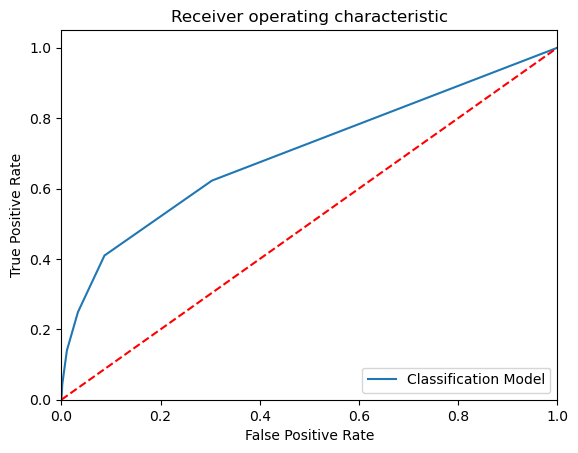

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 200  735]
 [ 106 7197]]
Outcome values : 
 200 735 106 7197
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.21      0.32       935
           0       0.91      0.99      0.94      7303

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

Accuracy : 89.8 %
Precision : 65.4 %
Recall : 21.4 %
F1 Score : 0.322
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.0 %
MCC : 0.334
roc_auc_score: 0.6


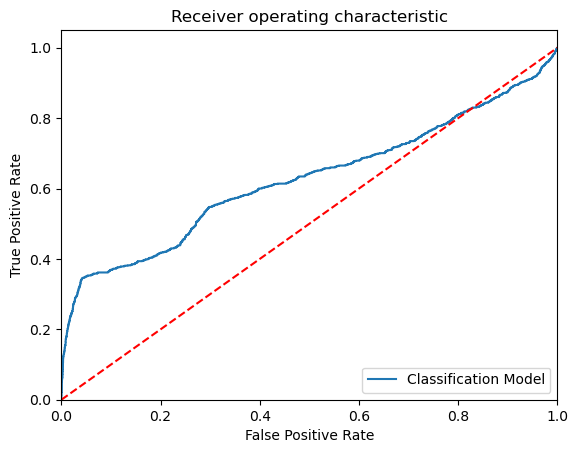

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 283  652]
 [ 241 7062]]
Outcome values : 
 283 652 241 7062
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.30      0.39       935
           0       0.92      0.97      0.94      7303

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Accuracy : 89.2 %
Precision : 54.0 %
Recall : 30.3 %
F1 Score : 0.388
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 63.5 %
MCC : 0.351
roc_auc_score: 0.635


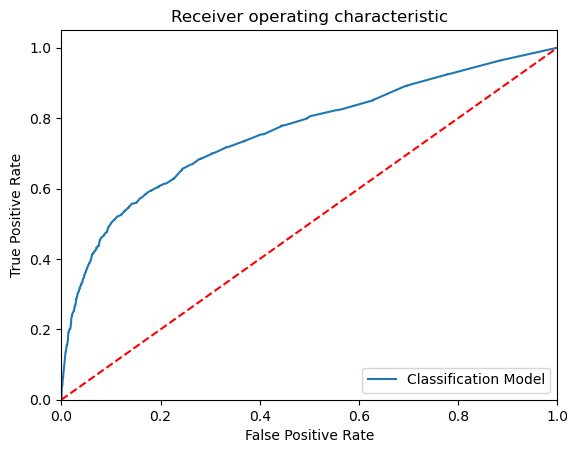

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 221  714]
 [ 125 7178]]
Outcome values : 
 221 714 125 7178
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.24      0.35       935
           0       0.91      0.98      0.94      7303

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238

Accuracy : 89.8 %
Precision : 63.9 %
Recall : 23.6 %
F1 Score : 0.345
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 60.9 %
MCC : 0.347
roc_auc_score: 0.61


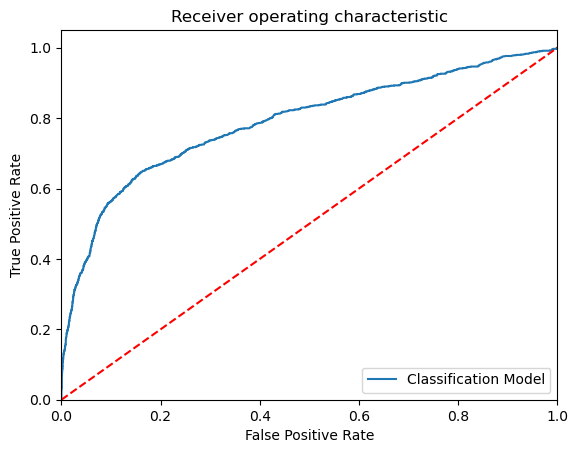

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 240  695]
 [ 142 7161]]
Outcome values : 
 240 695 142 7161
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.26      0.36       935
           0       0.91      0.98      0.94      7303

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238

Accuracy : 89.8 %
Precision : 62.8 %
Recall : 25.7 %
F1 Score : 0.364
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 61.9 %
MCC : 0.358
roc_auc_score: 0.619


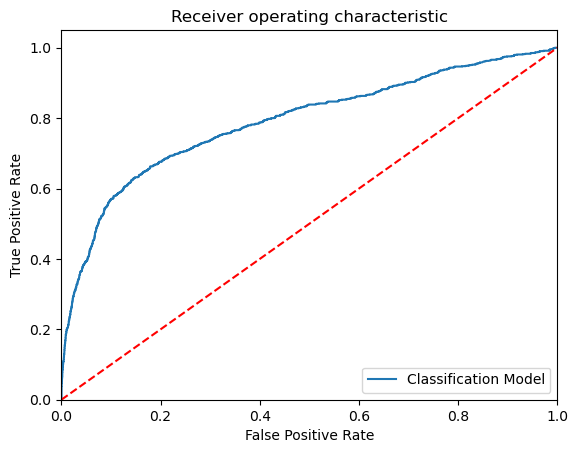

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 457  478]
 [ 872 6431]]
Outcome values : 
 457 478 872 6431
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.49      0.40       935
           0       0.93      0.88      0.91      7303

    accuracy                           0.84      8238
   macro avg       0.64      0.68      0.65      8238
weighted avg       0.86      0.84      0.85      8238

Accuracy : 83.6 %
Precision : 34.4 %
Recall : 48.9 %
F1 Score : 0.404
Specificity or True Negative Rate : 88.1 %
Balanced Accuracy : 68.5 %
MCC : 0.319
roc_auc_score: 0.685


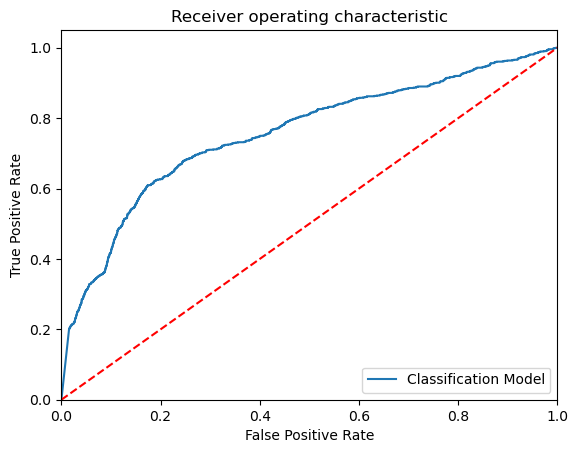

-----------------------------------------------------------------------------------------------------


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
 bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
  init=None,
random_state=None,
 max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
 validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    # actual values
    actual = y_test
    # predicted values
    predicted = y_pred
    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)
    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    # Matthews Correlation Coefficient (MCC). Range of values of MCC liebetween -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%' )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
    'True Positive' : tp,
    'False Negative' : fn,
    'False Positive' : fp,
    'True Negative' : tn,
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : sensitivity,
    'F1 Score' : f1Score,
    'Specificity' : specificity,
    'MCC':MCC,
    'ROC_AUC_Score':roc_auc_score(actual, predicted),
    'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
 #----------------------------------------------------------------------------------------------------------

In [16]:
Results


,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),191,744,109,7194,0.896,0.637,0.204,0.309,0.985,0.321,0.594676,0.594
1,DecisionTreeClassifier(),351,584,856,6447,0.825,0.291,0.375,0.328,0.883,0.232,0.629094,0.629
2,"(DecisionTreeClassifier(max_features='auto', r...",267,668,222,7081,0.892,0.546,0.286,0.375,0.970,0.343,0.627582,0.628
3,"(ExtraTreeClassifier(random_state=2093181261),...",290,645,286,7017,0.887,0.503,0.310,0.384,0.961,0.337,0.635499,0.636
4,KNeighborsClassifier(),233,702,244,7059,0.885,0.488,0.249,0.330,0.967,0.293,0.607893,0.608
5,SVC(probability=True),200,735,106,7197,0.898,0.654,0.214,0.322,0.985,0.334,0.599695,0.600
6,(DecisionTreeClassifier(random_state=174845328...,283,652,241,7062,0.892,0.540,0.303,0.388,0.967,0.351,0.634837,0.635
7,([DecisionTreeRegressor(criterion='friedman_ms...,221,714,125,7178,0.898,0.639,0.236,0.345,0.983,0.347,0.609624,0.609
8,LGBMClassifier(),240,695,142,7161,0.898,0.628,0.257,0.364,0.981,0.358,0.618620,0.619
9,GaussianNB(),457,478,872,6431,0.836,0.344,0.489,0.404,0.881,0.319,0.684684,0.685
